## Testing Z algorithm on the human genome

The human genome is ~3 billion nucleotides!

In [37]:
from Bio import Seq, SeqIO
from time import time
import matplotlib.pyplot as plt

from exact_matching import naive_match, Z_match

I used the package [ncbi-genome-download](https://pypi.org/project/ncbi-genome-download/) to download the Homo Sapiens genome. I ran `ncbi-genome-download -F fasta -g "Homo sapiens" vertebrate_mammalian`, used `gzip` to get the `.fna` file, and renamed it to "HomoSapiens.fna".

In [2]:
# Just use the first record since it's already huge
genome = next(SeqIO.parse("data/HomoSapiens.fna", "fasta")).seq
print(f"Length of selected genome section is {len(genome)}.")

Length of selected genome section is 248956422.


In [9]:
genome = str(genome)
genome = genome.replace("N", "")

In [10]:
len(genome)

230481014

In [5]:
# Over 3 billion nucleotides
assert sum(len(record) for record in SeqIO.parse("data/HomoSapiens.fna", "fasta")) > 3_000_000_000

In [31]:
# Pattern length (m) will be 1/10 of n
step = 2_000_000
ns = [(i + 1) * step for i in range(20)]

times_naive = {}
times_Z = {}

for n in ns: 
    m = n // 10 
    text = genome[:n]
    pattern = text[-m:]
    
    # Z match
    start = time()
    index = Z_match(pattern, text)
    end = time() 
    times_Z[n] = end - start
        
    # Naive match 
    start = time()
    index = naive_match(pattern, text)
    end = time() 
    times_naive[n] = end - start
    
    print(f"Complepted text size {n} with pattern size {m}.")

Complepted text size 2000000 with pattern size 200000.
Complepted text size 4000000 with pattern size 400000.
Complepted text size 6000000 with pattern size 600000.
Complepted text size 8000000 with pattern size 800000.
Complepted text size 10000000 with pattern size 1000000.
Complepted text size 12000000 with pattern size 1200000.
Complepted text size 14000000 with pattern size 1400000.
Complepted text size 16000000 with pattern size 1600000.
Complepted text size 18000000 with pattern size 1800000.
Complepted text size 20000000 with pattern size 2000000.
Complepted text size 22000000 with pattern size 2200000.
Complepted text size 24000000 with pattern size 2400000.
Complepted text size 26000000 with pattern size 2600000.
Complepted text size 28000000 with pattern size 2800000.
Complepted text size 30000000 with pattern size 3000000.
Complepted text size 32000000 with pattern size 3200000.
Complepted text size 34000000 with pattern size 3400000.
Complepted text size 36000000 with patt

In [32]:
y_Z = []
y_naive = [] 

for n in ns: 
    y_Z.append(times_Z[n])
    y_naive.append(times_naive[n])

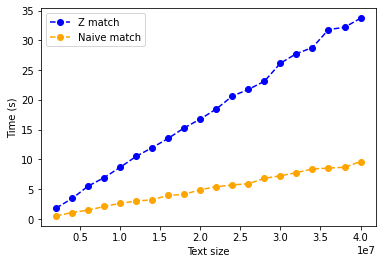

In [36]:
plt.plot(ns, y_Z, linestyle="--", marker="o", color="b", label="Z match")
plt.plot(ns, y_naive, linestyle="--", marker="o", color="orange", label="Naive match")
plt.xlabel("Text size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

The Z match algorithm worse than naive! I think Z match is better when there are lots of prefixes of the pattern, because then we can take advantage of using the informatin we already know while naive is stuck in its inner for loop many times. 